In [1]:
import os
import sys

import cv2
import PIL
from PIL import Image

# Binary Classification

In [2]:
# Assign the path to the training data
data_dir = os.path.join("data_p1", "data_binary")
train_dir = os.path.join(data_dir, "train")

print("Data Directory:", data_dir)
print("Training Data Directory:", train_dir)

Data Directory: data_p1\data_binary
Training Data Directory: data_p1\data_binary\train


In [3]:
# Get the labels
labels = os.listdir(train_dir)
labels

['blank', 'hog']

In [6]:
# determine the number of images in each class folder
hog_path = os.path.join(train_dir, "hog")
hog_images = os.listdir(hog_path)
print("length of hog images: ", len(hog_images))

blank_path = os.path.join(train_dir, "blank")
blank_images = os.listdir(blank_path)
print("length of blank images: ", len(blank_images))

length of hog images:  1
length of blank images:  1


In [8]:
# Define the path of image
hog_image_name = hog_images[0]
print(hog_image_name)

hog_image_path = os.path.join(hog_path, hog_image_name)
print(hog_image_path)

blank_image_name = blank_images[0]
print(blank_image_name)

blank_image_path = os.path.join(blank_path, blank_image_name)
print(blank_image_path)

ZJ001347.jpg
data_p1\data_binary\train\hog\ZJ001347.jpg
ZJ001368.jpg
data_p1\data_binary\train\blank\ZJ001368.jpg


In [9]:
# Print out the mode and size
hog_img_pil = Image.open(hog_image_path)
print("Hog image: ", hog_img_pil.mode, hog_img_pil.size)

blank_img_pil = Image.open(blank_image_path)
print("Blank image: ", blank_img_pil.mode, blank_img_pil.size)

Hog image:  L (640, 360)
Blank image:  RGB (960, 540)


In [10]:
# Display the image
hog_img_pil.show()
blank_img_pil.show()

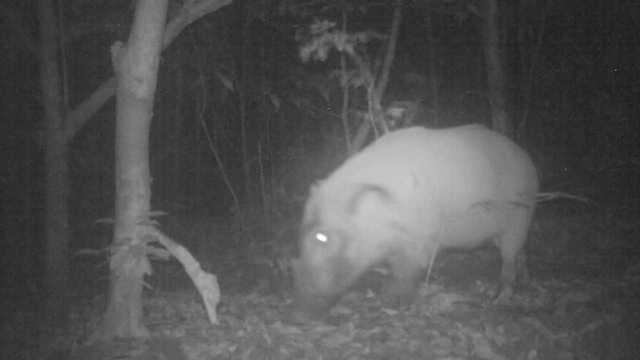

In [ ]:
# Display the image
hog_img_pil

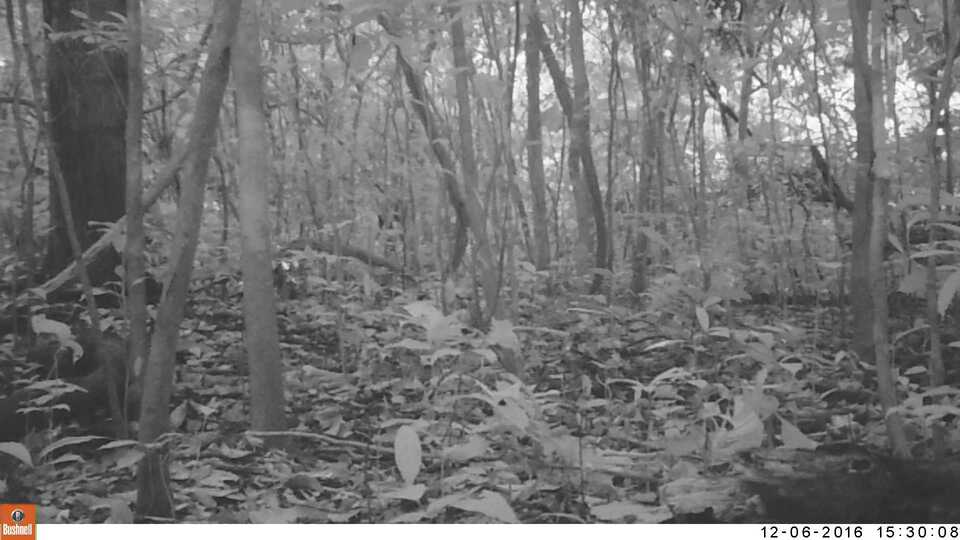

In [ ]:
# Display the image
blank_img_pil

# Multiclass Classification

In [13]:
# Assign the path to the training data
data_dir = "data_p1/data_multiclass/"
train_dir = os.path.join(data_dir, "train")

print("Will read data from", train_dir)

Will read data from data_p1/data_multiclass/train


In [14]:
# Get the labels 
labels = os.listdir(train_dir)
labels

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

In [16]:
# import libraries
import torch
import torchvision
from torchvision import datasets, transforms

In [20]:
# Convert the image to RGB if it is not already
class ConvertToRGB:
    def __call__(self, img):
        if img.mode != "RGB":
            img = img.convert("RGB")
        return img

In [22]:
# Preparing the data transformation
transform = transforms.Compose([
    ConvertToRGB(),  # Ensure image is in RGB mode
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Converts to tensor with shape [C, H, W]
])

In [24]:
# Create the dataset
dataset = datasets.ImageFolder(root=train_dir, transform=transform)

print("Classes:")
print(dataset.classes)
print(f"That's {len(dataset.classes)} classes")
print()
print("Tensor shape for one image:")
print(dataset[0][0].shape)

Classes:
['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']
That's 8 classes

Tensor shape for one image:
torch.Size([3, 224, 224])


## Display the image correctly:
When you display the image, it might look grayscale even if it's in RGB, because:

Some grayscale images are converted to RGB but still have equal R=G=B values.

You might be plotting it incorrectly in matplotlib.

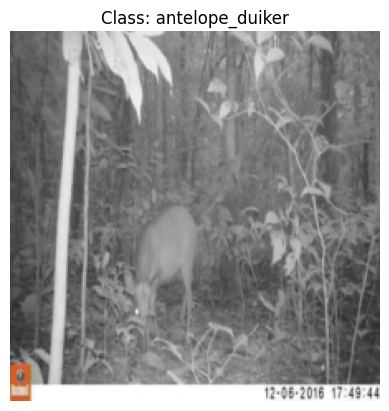

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Get an image and its label
img_tensor, label = dataset[0]

# Convert the tensor from [C, H, W] to [H, W, C] for matplotlib
img_np = img_tensor.permute(1, 2, 0).numpy()

# Display image
plt.imshow(img_np)
plt.title(f"Class: {dataset.classes[label]}")
plt.axis("off")
plt.show()


## Final Check
If the image still looks grayscale after all this, it’s likely because:

The original image was grayscale (1 channel), and even though it's now 3-channel RGB, all 3 channels contain the same grayscale data, so it still looks gray, even though it's technically RGB.

In [26]:
# Final Check
print(img_tensor.shape)  # Should be [3, 224, 224]
print(torch.allclose(img_tensor[0], img_tensor[1]))  # True if all channels are same


torch.Size([3, 224, 224])
False


In [27]:
# Batch processing of images by using DataLoader
from torch.utils.data import DataLoader

# Create the dataloader
batch_size = 32
dataset_loader = DataLoader(dataset, batch_size=batch_size)

# Get one batch
first_batch = next(iter(dataset_loader))

print(f"Shape of one batch: {first_batch[0].shape}")
print(f"Shape of labels: {first_batch[1].shape}")
print(f"Labels: {first_batch[1]}")

Shape of one batch: torch.Size([8, 3, 224, 224])
Shape of labels: torch.Size([8])
Labels: tensor([0, 1, 2, 3, 4, 5, 6, 7])


In [28]:
# Normalize the images data with  mean of 0 & a standard deviation of 1
def get_mean_std(loader):
    """Computes the mean and standard deviation of image data.

    Input: a `DataLoader` producing tensors of shape [batch_size, channels, pixels_x, pixels_y]
    Output: the mean of each channel as a tensor, the standard deviation of each channel as a tensor
            formatted as a tuple (means[channels], std[channels])"""

    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in tqdm(loader, desc="Computing mean and std", leave=False):
        channels_sum += torch.mean(data, dim=[0, 2, 3])
        channels_squared_sum += torch.mean(data**2, dim=[0, 2, 3])
        num_batches += 1
    mean = channels_sum / num_batches
    std = (channels_squared_sum / num_batches - mean**2) ** 0.5

    return mean, std

In [31]:
# run the function to get mean and std
from tqdm import tqdm
mean, std = get_mean_std(dataset_loader)

print(f"Mean: {mean}")
print(f"Standard deviation: {std}")


Mean: tensor([0.4071, 0.4216, 0.3958])
Standard deviation: tensor([0.2113, 0.2041, 0.2203])


In [32]:
# Preparing the data transformation with normalization
transform_norm = transforms.Compose(
    [
        ConvertToRGB(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ]
)

In [35]:
# Create the dataset with normalization
norm_dataset = datasets.ImageFolder(root=train_dir, transform=transform_norm)
# Create the DataLoader for the normalized dataset
norm_loader = DataLoader(dataset=norm_dataset, batch_size=32)

In [36]:
# run the function to get mean and std
norm_mean, norm_std = get_mean_std(norm_loader)

print(f"Mean: {norm_mean}")
print(f"Standard deviation: {norm_std}")

Mean: tensor([-1.6057e-07,  2.9194e-08,  9.7314e-09])
Standard deviation: tensor([1.0000, 1.0000, 1.0000])
